# Exploratory Data Analysis for train data and test data
This file contains the exploratory data analysis for the rental rate prediction project.

## 1. Prepare the data
- import necessary libraries
- load the data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import data
df_train = pd.read_csv('../data/raw/train.csv')
df_test = pd.read_csv('../data/raw/test.csv')


## 2. Check the data
- Check the shape of the data
- Check the data types of each column
- Check the missing values

In [3]:
# Check train data
print('total train data records: ', df_train.shape[0])
print('total train data properties: ', df_train.shape[1])
# df_train.head()
print(df_train.info())

total train data records:  60000
total train data properties:  16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region              

In [4]:
# Check test data
print('total test data records: ', df_test.shape[0])
# df_train.head()
print(df_test.info())


total test data records:  30000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   30000 non-null  object 
 1   town                 30000 non-null  object 
 2   block                30000 non-null  object 
 3   street_name          30000 non-null  object 
 4   flat_type            30000 non-null  object 
 5   flat_model           30000 non-null  object 
 6   floor_area_sqm       30000 non-null  float64
 7   furnished            30000 non-null  object 
 8   lease_commence_date  30000 non-null  int64  
 9   latitude             30000 non-null  float64
 10  longitude            30000 non-null  float64
 11  elevation            30000 non-null  float64
 12  subzone              30000 non-null  object 
 13  planning_area        30000 non-null  object 
 14  region               30000 non-null  object 
dtypes: f

## 3. Choose features for visualized analysis
- classify all the features into 2 categories: numerical, categorical
- check each feature's unique values
- choose features for visualized analysis

In [19]:
# target feature
target_feature = 'monthly_rent'
# total 6 numerical features
numerical_features = ['floor_area_sqm',
                      'lease_commence_date', 'latitude', 'longitude', 'elevation']
for feature in numerical_features:
    print('unique values of ', feature, ': ', df_train[feature].nunique())


unique values of  floor_area_sqm :  146
unique values of  lease_commence_date :  54
unique values of  latitude :  8612
unique values of  longitude :  8612
unique values of  elevation :  1


In [18]:
# total 10 categorical features
categorical_features = ['rent_approval_date', 'town', 'block', 'street_name',
                        'flat_type', 'flat_model', 'furnished', 'subzone', 'planning_area', 'region']
for feature in categorical_features:
    print('unique values of ', feature, ': ', df_train[feature].nunique())

unique values of  rent_approval_date :  31
unique values of  town :  26
unique values of  block :  2553
unique values of  street_name :  1083
unique values of  flat_type :  9
unique values of  flat_model :  19
unique values of  furnished :  1
unique values of  subzone :  152
unique values of  planning_area :  29
unique values of  region :  5


In [38]:
# For numerical features, only delete 'elevation' feature as it has only 1 unique value
numerical_features = ['floor_area_sqm',
                      'lease_commence_date', 'latitude', 'longitude']
# For categorical features, delete 'block', 'street_name' and 'subzone' as they have too many unique values
# and delete 'furnished' as it has only 1 unique value
categorical_features = ['rent_approval_date', 'town',
                        'flat_type', 'flat_model', 'planning_area', 'region']

## 4. Single feature analysis
- check the distribution of each feature by histograms 

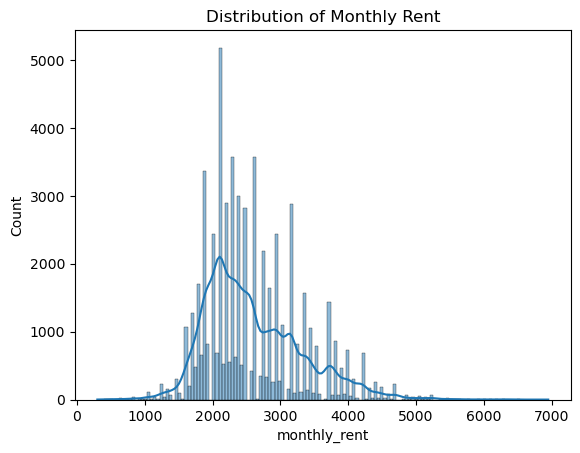

In [39]:
# check distributsion of the target feature
sns.histplot(df_train[target_feature],kde=True)
plt.title('Distribution of Monthly Rent')
plt.show()


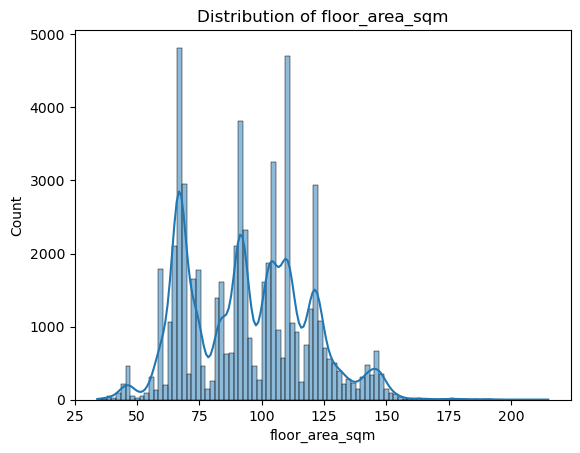

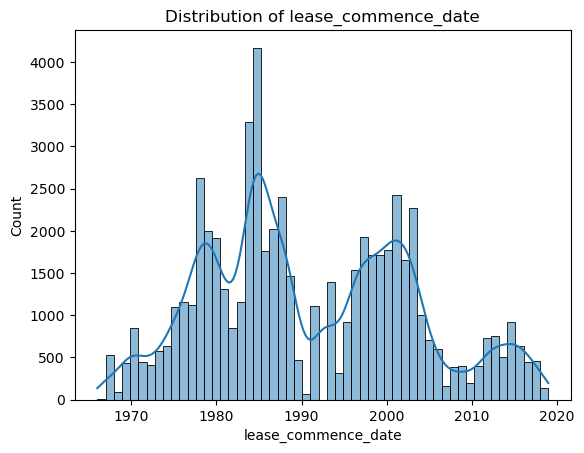

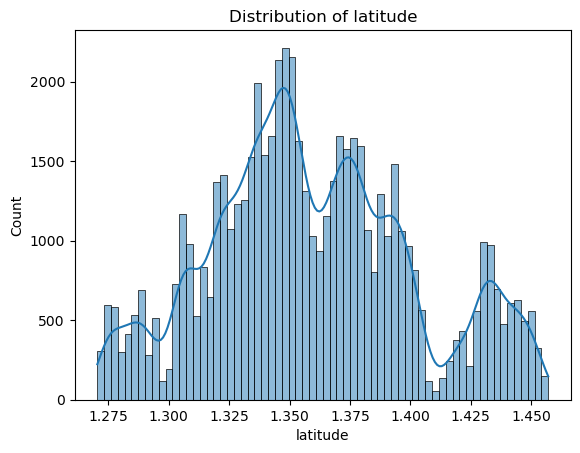

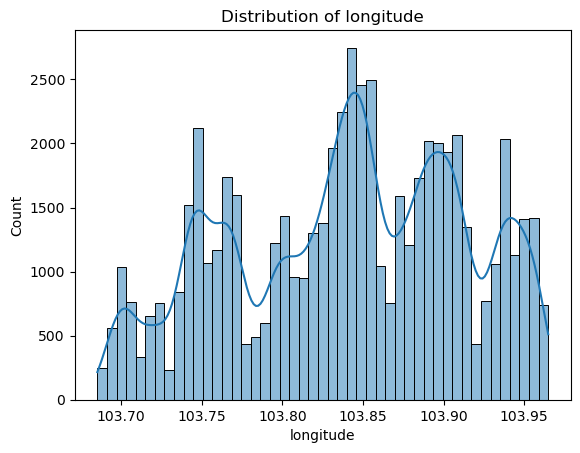

In [40]:
# check distributsion of the numerical features
for feature in numerical_features:
    sns.histplot(df_train[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

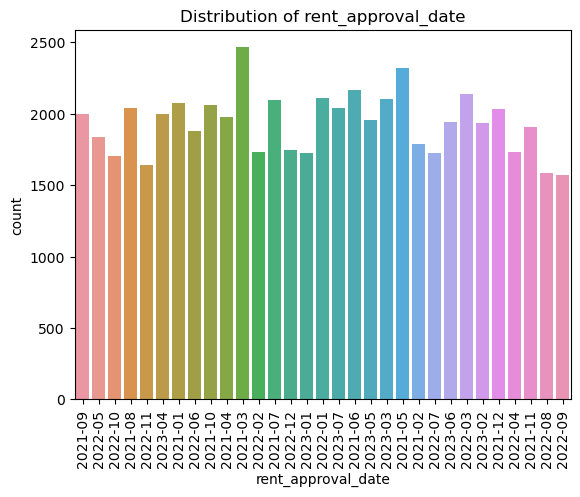

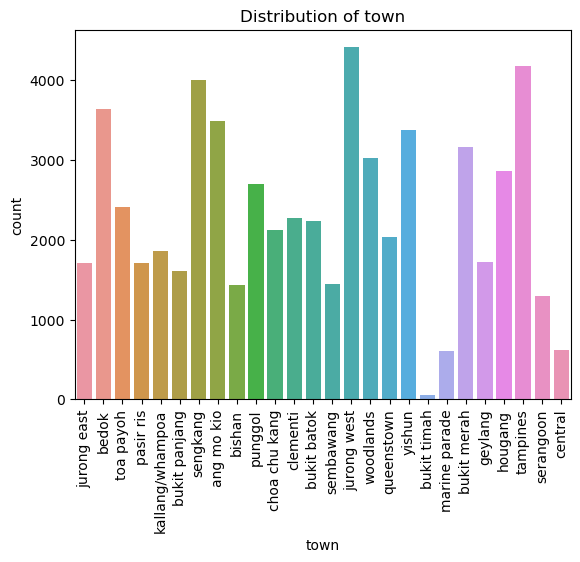

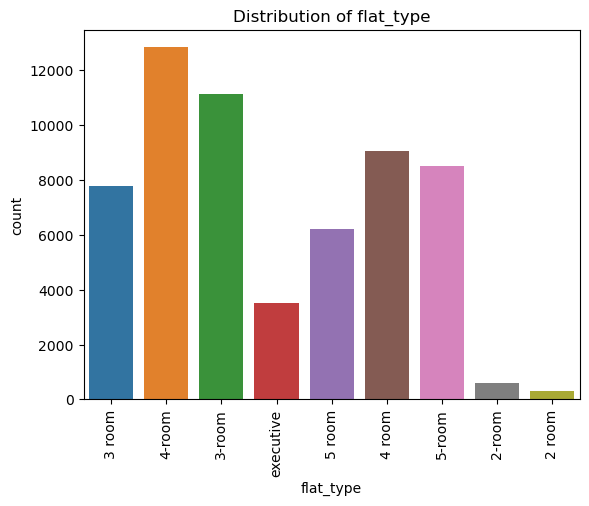

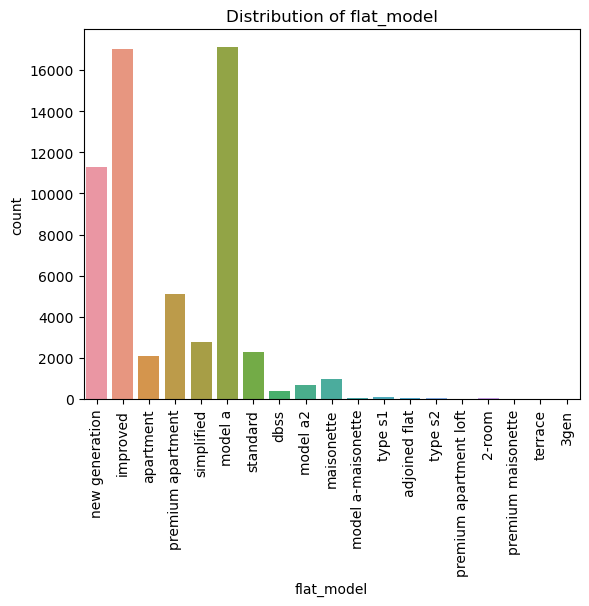

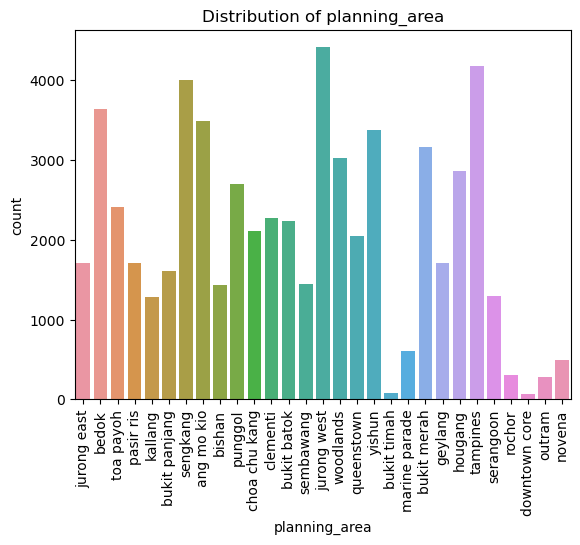

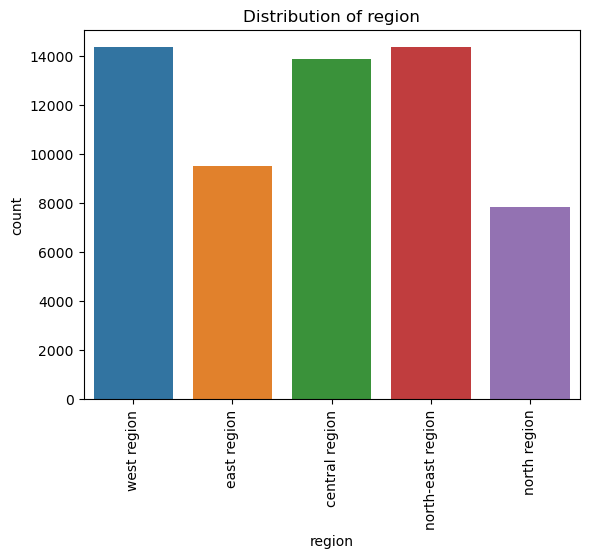

In [41]:
for feature in categorical_features:
    sns.countplot(x=feature, data=df_train)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=90)
    plt.show()

## 5. Multiple features analysis
- check the relationship between target and numerical features by scatter plot
- check the relationship between target and categorical features by box plot
- check the correlation between numerical features by correlation matrix

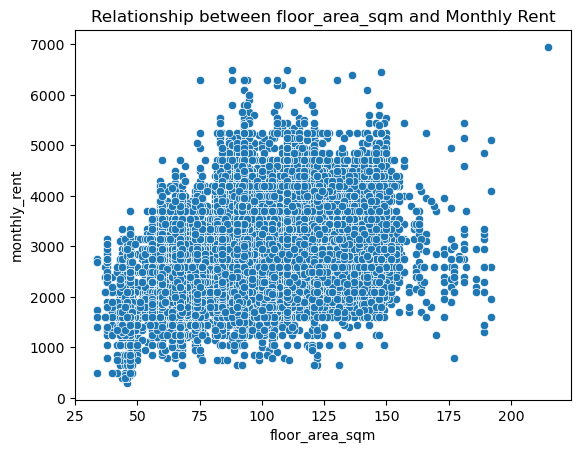

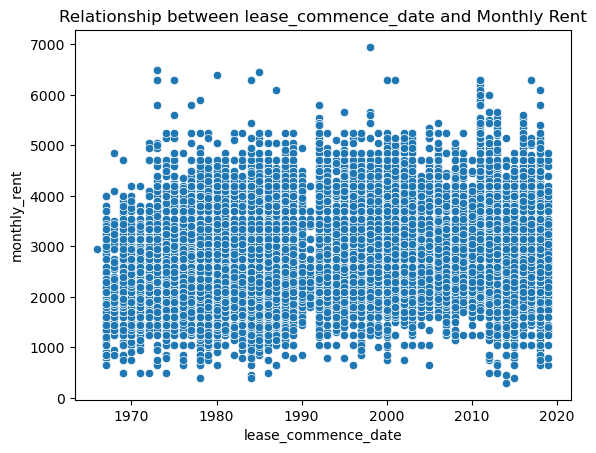

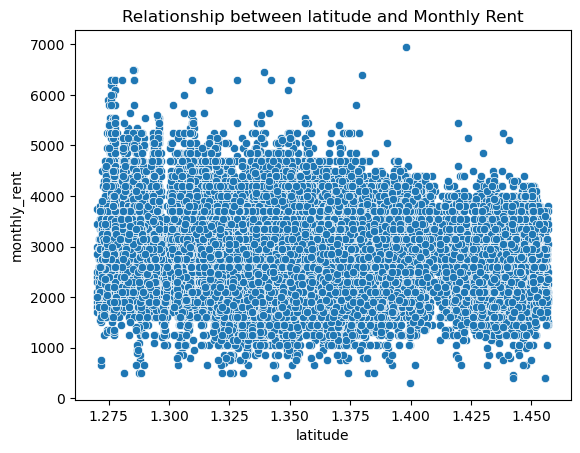

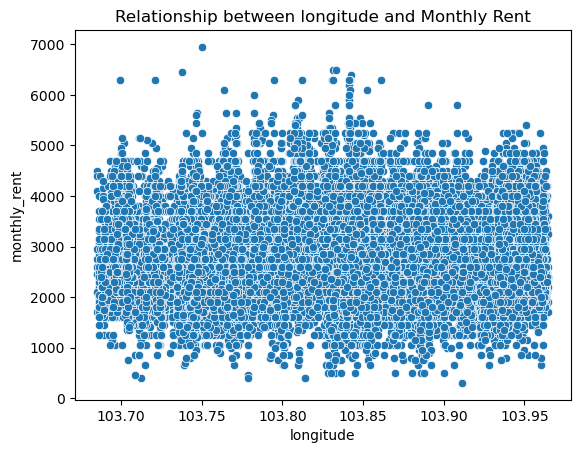

In [42]:
# check relationship between target feature and numerical features
for feature in numerical_features:
    sns.scatterplot(x=df_train[feature], y=df_train['monthly_rent'])
    plt.title(f'Relationship between {feature} and Monthly Rent')
    plt.show()

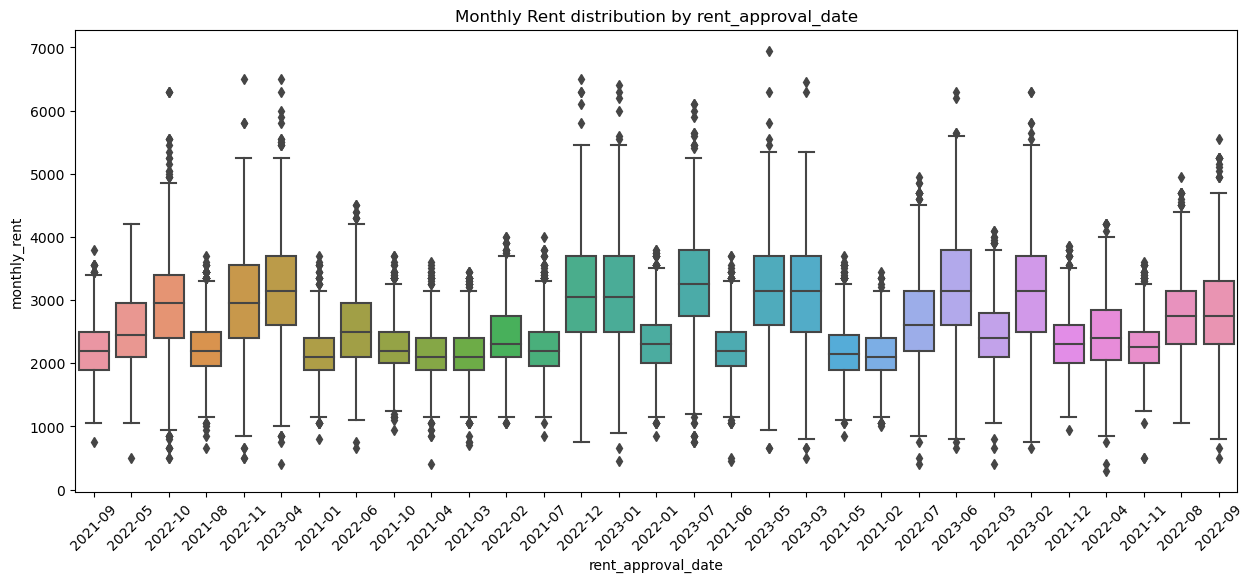

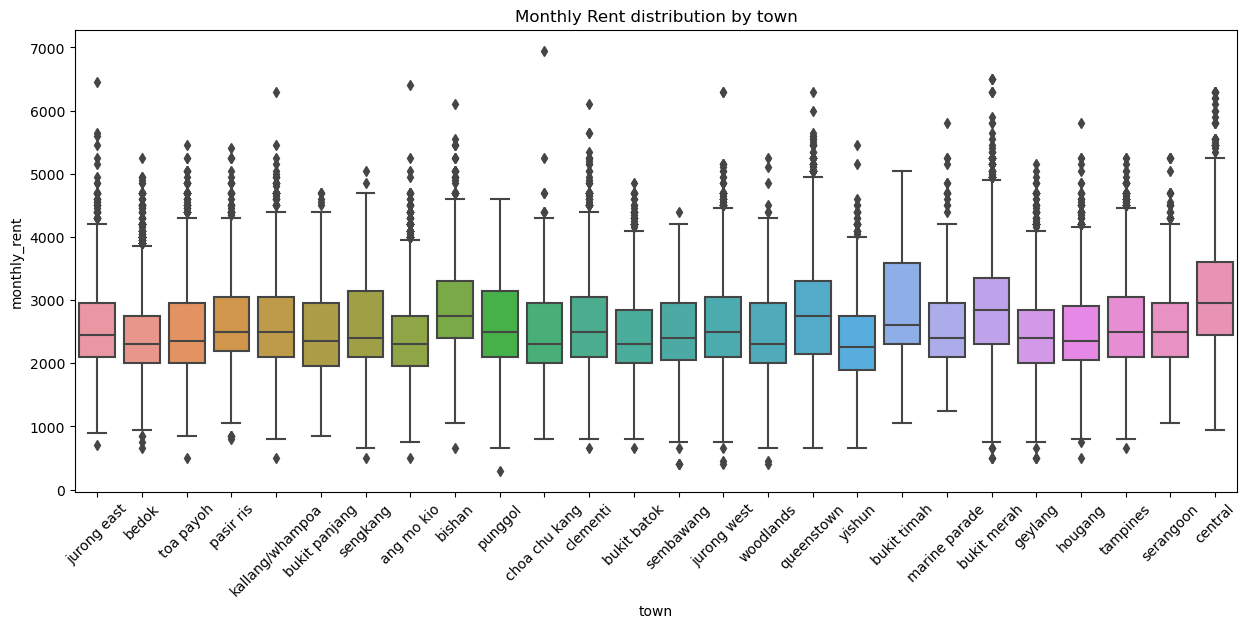

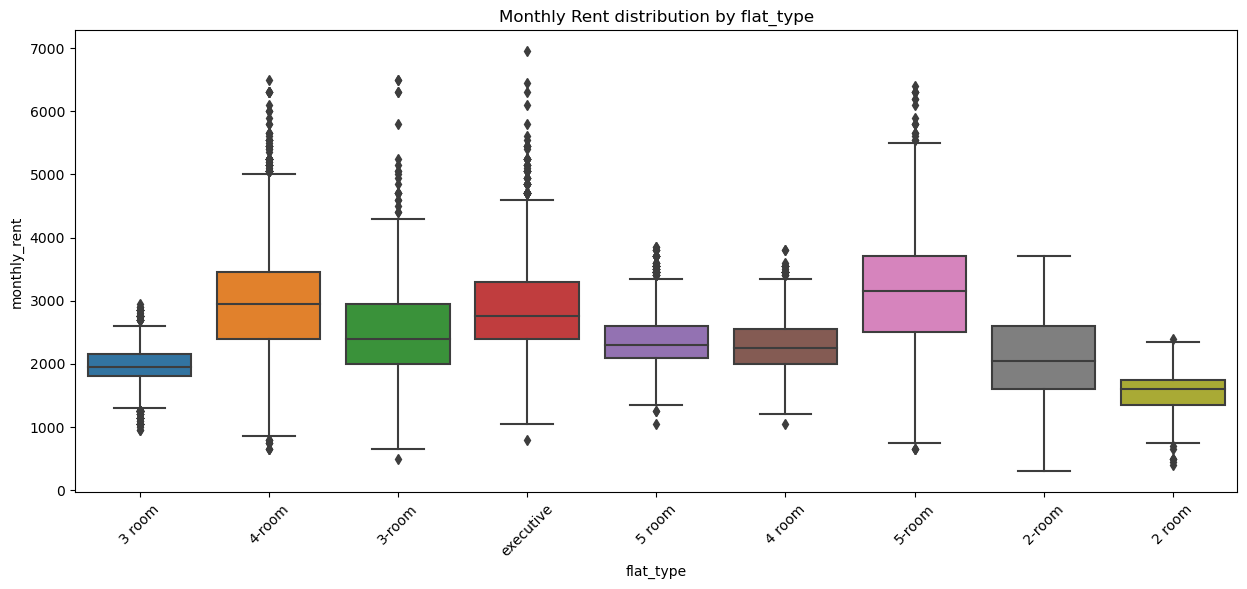

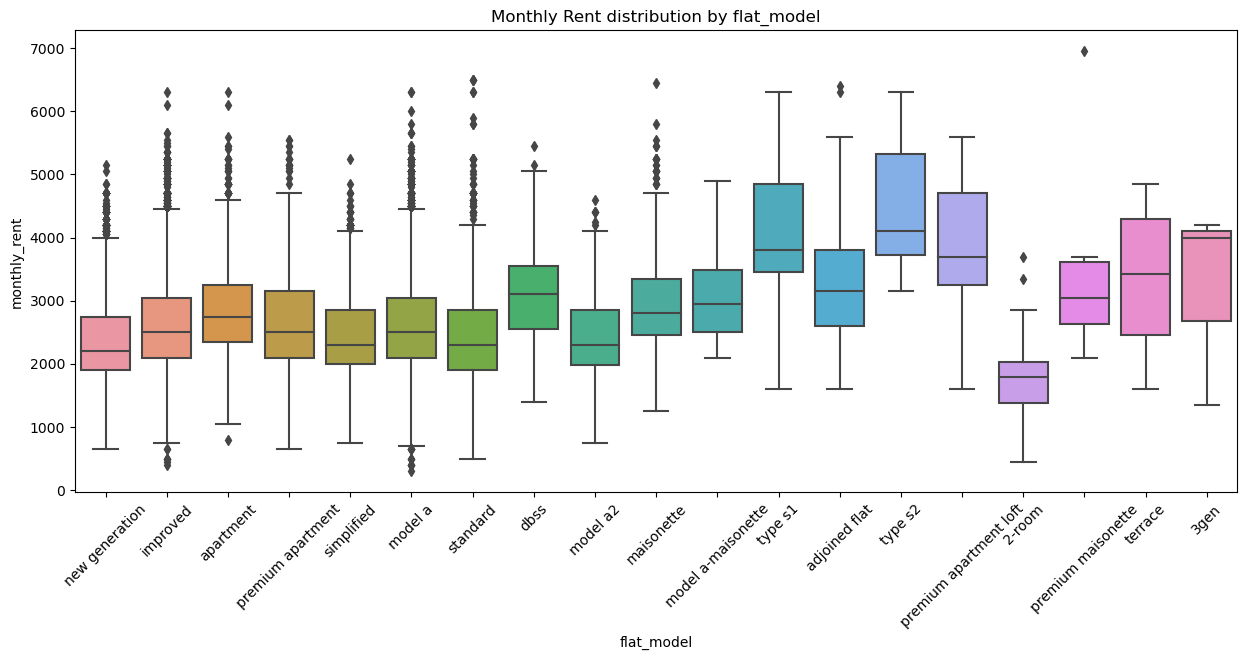

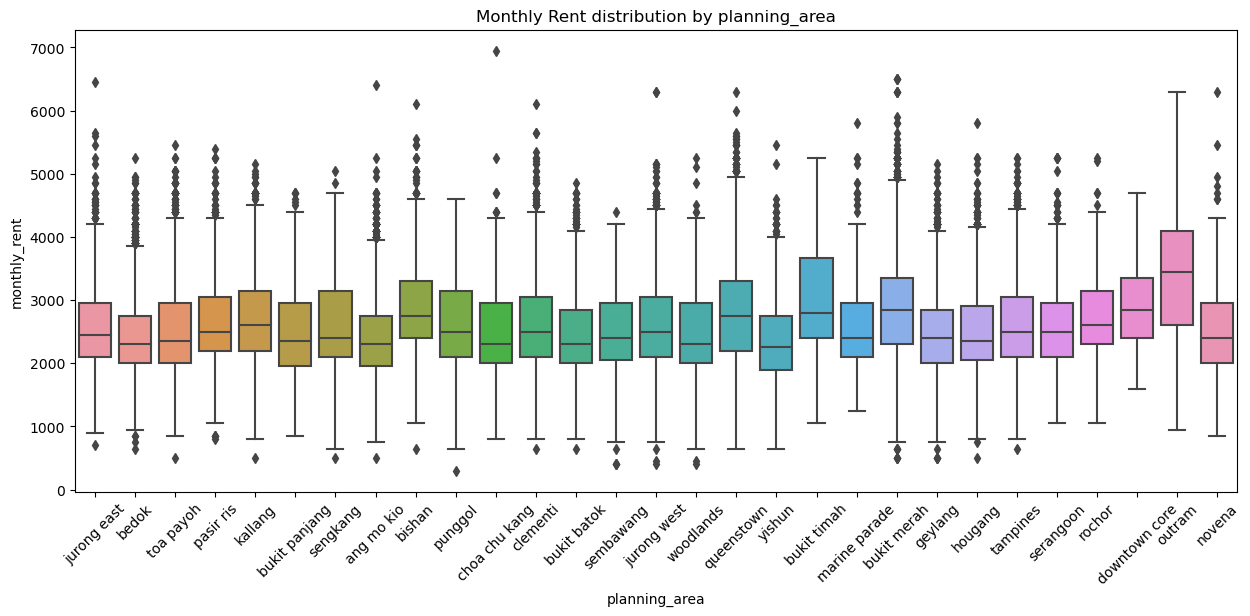

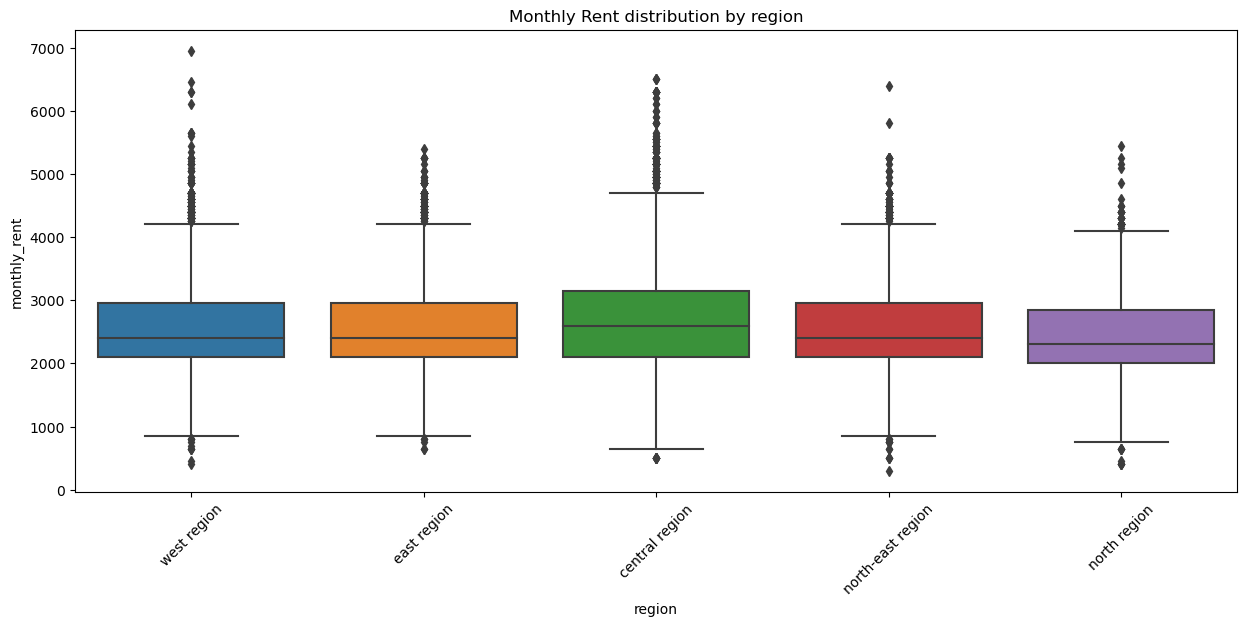

In [43]:
# check relationship between target feature and categorical features
for feature in categorical_features:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=df_train[feature], y=df_train['monthly_rent'])
    plt.title(f'Monthly Rent distribution by {feature}')
    plt.xticks(rotation=45)
    plt.show()

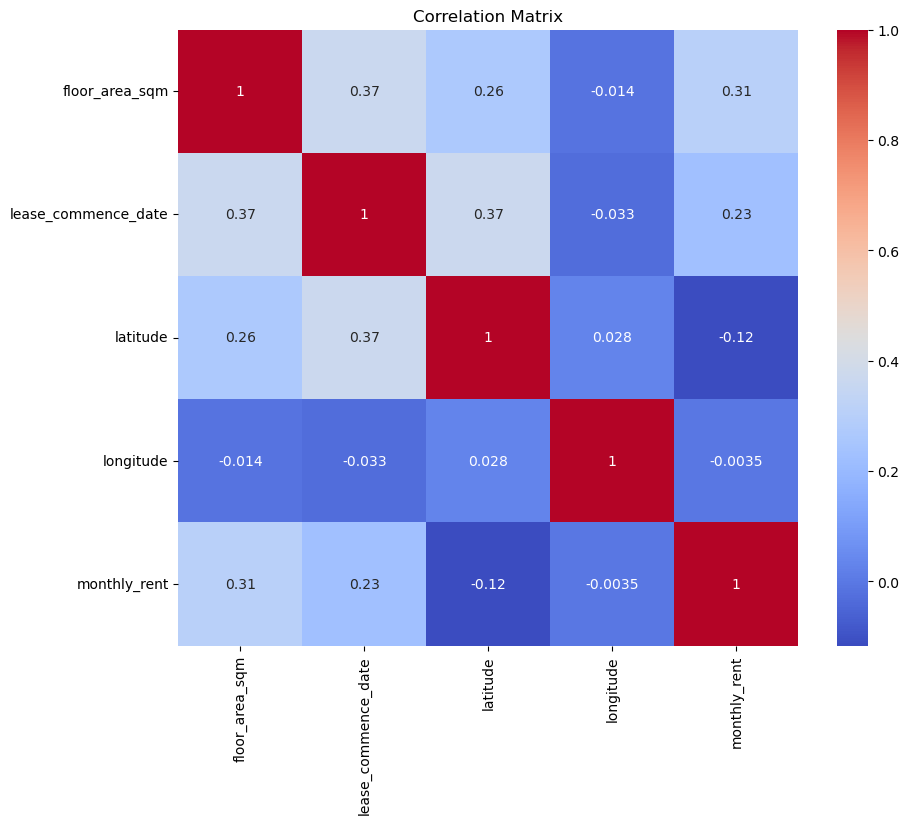

In [44]:
# check correlation between numerical features
correlation_matrix = df_train[numerical_features + ['monthly_rent']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()